In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

In [2]:
# Importing MNIST dataset
df_train = pd.read_csv(r'C:\Users\chinky\Desktop\bharatintern\train.csv.zip')
df_test = pd.read_csv(r'C:\Users\chinky\Desktop\bharatintern\test.csv.zip')

In [3]:
y_train=df_train['label']
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
x_train = df_train.drop('label', axis=1)
x_train = x_train.values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
x_train.shape

(42000, 784)

In [6]:
y_train.shape

(42000,)

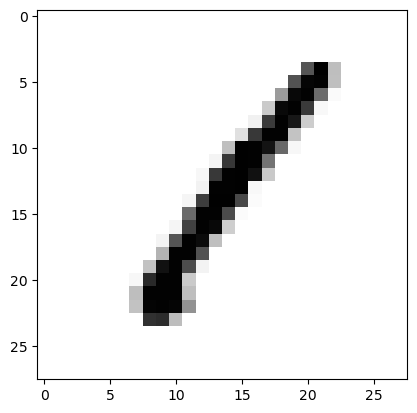

In [7]:
# Reshaping array to visualize the images
plt.imshow(x_train[0].reshape(28,28), cmap='Greys')
plt.show()

In [8]:
x_train = x_train.reshape(42000,28,28)

In [9]:
x_train.shape

(42000, 28, 28)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=19)

In [11]:
x_train.shape

(37800, 28, 28)

In [12]:
x_valid.shape

(4200, 28, 28)

In [13]:
from tensorflow.keras.utils import to_categorical
y_cat_valid = to_categorical(y_valid, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

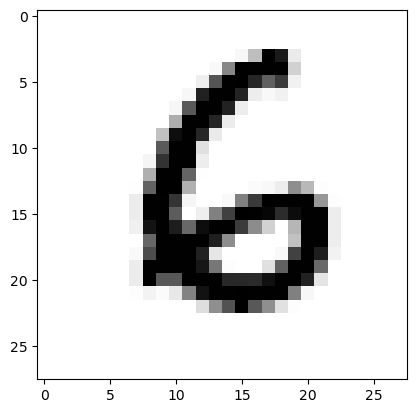

In [14]:
first_image = x_train[0]
plt.imshow(first_image, cmap='Greys')
plt.show()

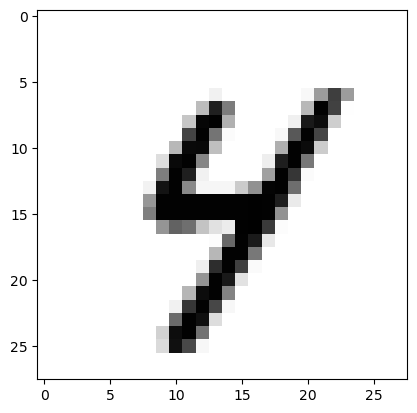

In [15]:
first_image = x_train[15]
plt.imshow(first_image, cmap='Greys')
plt.show()

In [16]:
print('Actual image:')
print(y_train[0])

Actual image:
1


In [17]:
first_image.max()

255

In [18]:
first_image.min()

0

In [19]:
x_train_scaled = x_train/255
x_valid_scaled = x_valid/255

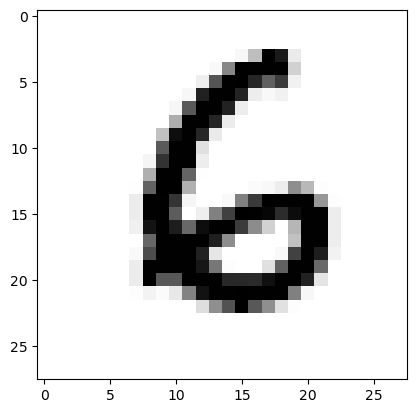

In [20]:
# Rechecking image after scaling
plt.imshow(x_train_scaled[0], cmap='Greys')
plt.show()

In [21]:
# (batch_size, width, height, color_channels)
x_train_final = x_train_scaled.reshape(37800,28,28,1)
x_valid_final = x_valid_scaled.reshape(4200,28,28,1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [23]:
# Instantiate model
model = Sequential()

# Convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Convolution layer 2
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Pooling layer (selected half of kernel_size)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Convolution layer 3
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Convolution layer 4
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Pooling layer (selected half of kernel_size)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening image
model.add(Flatten())
# Dense layer
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              fill_mode='nearest')

In [28]:
train_image_gen = image_gen.fit(x_train_final)

In [29]:
train_image_gen

In [30]:
model.fit_generator(image_gen.flow(x_train_final, y_cat_train), epochs=10, validation_data=(x_valid_final, y_cat_valid), callbacks=[early_stop])

C:\Users\chinky\AppData\Local\Temp\ipykernel_13340\3436906532.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(image_gen.flow(x_train_final, y_cat_train), epochs=10, validation_data=(x_valid_final, y_cat_valid), callbacks=[early_stop])


Epoch 1/10
1182/1182 [==============================] - 149s 118ms/step - loss: 0.2856 - accuracy: 0.9102 - val_loss: 0.0664 - val_accuracy: 0.9817
Epoch 2/10
1182/1182 [==============================] - 150s 127ms/step - loss: 0.0927 - accuracy: 0.9715 - val_loss: 0.0342 - val_accuracy: 0.9907
Epoch 3/10
1182/1182 [==============================] - 149s 126ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.0593 - val_accuracy: 0.9802
Epoch 4/10
1182/1182 [==============================] - 159s 134ms/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.0521 - val_accuracy: 0.9836


In [31]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.285630,0.910159,0.066412,0.981667
1,0.092664,0.971482,0.034228,0.990714
2,0.077100,0.976984,0.059340,0.980238
3,0.061842,0.981164,0.052141,0.983571


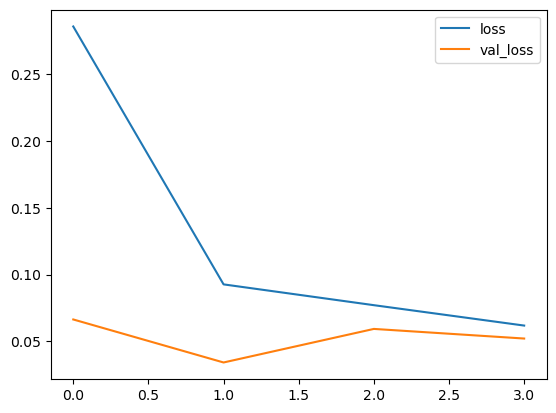

In [32]:
metrics[['loss', 'val_loss']].plot()
plt.show()

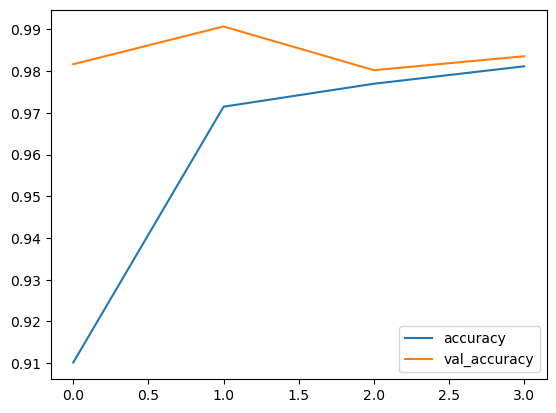

In [33]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

In [34]:
model.evaluate(x_valid_final, y_cat_valid, verbose=0)

[0.0521407276391983, 0.9835714101791382]

In [44]:
import numpy as np

# Assuming x_valid_final is your validation data
y_pred_probs = model.predict(x_valid_final)
y_pred = np.argmax(y_pred_probs, axis=1)

y_pred

132/132 [==============================] - 2s 18ms/step


array([7, 7, 5, ..., 8, 1, 4], dtype=int64)

In [45]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_valid, y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_valid, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       417
           1       0.99      0.99      0.99       476
           2       0.97      0.98      0.98       384
           3       0.98      0.99      0.99       451
           4       1.00      0.97      0.99       391
           5       0.97      1.00      0.98       424
           6       0.99      0.99      0.99       403
           7       1.00      0.96      0.98       470
           8       0.96      0.99      0.97       383
           9       0.98      0.98      0.98       401

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



Confusion Matrix:
[[411   0   0   0   0   0   1   0   5   0]
 [  0 470   1   2   0   0   0   0   3   0]
 [  0   0 378   4   0   0   0   0   2   0]
 [  0   0   0 446   0   3   0   0   0   2]
 [  0   2   0   0 380   0 

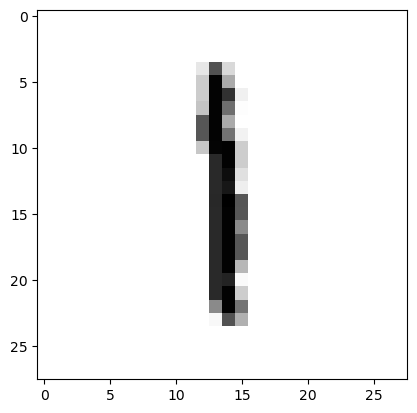

In [46]:
np.random.seed(19)
random_selection = np.random.randint(0, 4201, size=1)
random_sample = x_valid_final[random_selection]
plt.imshow(random_sample.reshape(28,28), cmap='Greys')
plt.show()

In [48]:
import numpy as np

# Assuming random_sample is your input sample
prediction_probs = model.predict(random_sample.reshape(1, 28, 28, 1))
predicted_class_index = np.argmax(prediction_probs)
print('Prediction:', predicted_class_index)


1/1 [==============================] - 0s 76ms/step
Prediction: 1


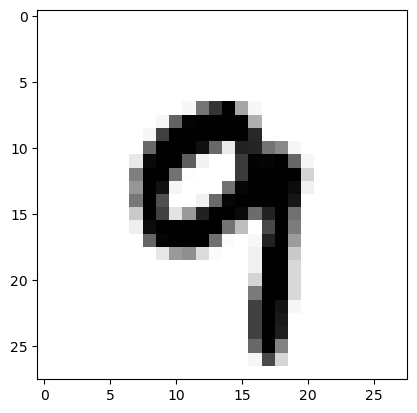

In [49]:
np.random.seed(20)
random_selection_2 = np.random.randint(0, 4201, size=1)
random_sample_2 = x_valid_final[random_selection_2]
plt.imshow(random_sample_2.reshape(28,28), cmap='Greys')
plt.show()

In [51]:
import numpy as np

# Assuming random_sample is your input sample
prediction_probs = model.predict(random_sample_2.reshape(1, 28, 28, 1))
predicted_class_index = np.argmax(prediction_probs)
print('Prediction:', predicted_class_index)

1/1 [==============================] - 0s 26ms/step
Prediction: 9


In [52]:
x_test = df_test.values
x_test = x_test.reshape(28000,28,28)
x_test.shape

(28000, 28, 28)

In [53]:
x_test_scaled = x_test/255

In [55]:
import numpy as np

# Assuming x_test_scaled is your test data
prediction_probs = model.predict(x_test_scaled.reshape(28000, 28, 28, 1))
predicted_classes = np.argmax(prediction_probs, axis=1)


875/875 [==============================] - 17s 19ms/step


In [58]:
predicted_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)